# inheritance

In [1]:
# براینکه بفهمیم یک کلاس از چه کلاس هایی ارثبری کرده

class Example:
    pass

print(Example.__base__)

<class 'object'>


In [3]:
# برای ارث بری

class Example(object):
    pass

# میتونیم کلاس آبجکت را بنویسیم یا ننویسیم

print(Example.__base__)

<class 'object'>


In [9]:
# کلاس فرزند تمام متدها و اتریبیوت های کلاس پدر را دارد
# به اتریبویت های کلاس نیز دسترسی داریم در فرزند
from typing import List

class User:
    all_users: List["User"] = []
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"
    
    
class Seller(User):
    def order(self, order: "Order") -> None:
        print(f"{self.name} ,your {order} ordred")

s1 = Seller("ali", 23)
print(s1)
print(s1.all_users)

ali
[Seller('ali', 23)]


# inheritance from buildtins

In [11]:
# در واقع داریم یک آبجکت از آن کلاس میسازیم

y = list()
x = int()

print(x)

# در اینجا میخاهیم یک قابلیت جدید به متدهای داخلی کلاس ها اضافه بکنیم
# تغییر متدهای دیفالت این کلاس ها نیاز به دانش درباره آن متد ها و ریسک بالایی دارد

0


In [20]:
from typing import List
from pprint import pprint

class UserList(list["User"]):
    def search(self, user_name: str) -> list["User"]:
        matching_users: list["User"] = []
        for user in self:
            if user_name in user.name:
                matching_users.append(user)
        return matching_users
    
class User:
    all_users: list["User"] = UserList()
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"


# برای اینکه مشخص بکنیم عناصر لیست چی هستند از کلاس یوزر استفاده میکنیم   
# class UserList(list):

# حالا میتونیم بجای لیست خود پایتون از این لیست استفاده بکنیم
    
    
print(dir(UserList))
# میبینیم که متدهای تایپ(کلاس) لیست ها را دارد

print()

user1 = User("ali", 3)
user2 = User("amir", 12)
user3 = User("alis", 23)
    
pprint(User.all_users)
    
print()

pprint(User.all_users.search("ali"))


['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__orig_bases__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'search', 'sort']

[User('ali', 3), User('amir', 12), User('alis', 23)]

[User('ali', 3), User('alis', 23)]


# overriding - super

In [5]:

class User:
    all_users: list["User"] = []
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"

    
class Buyer(User):
    def __init__(self, phone:str) -> None:
        self.phone = phone
        
buyer = Buyer("0939")

print(buyer.phone)
print(buyer.name)

# در اینجا درواقع اومدیم از یوزر ارثبری کردیم اما اتریبیوت نام که در یوزر بوده در بایر وجود ندارد
# در واقع ما در اینجا اینیت را اوررایت کرده اییم


0939


AttributeError: 'Buyer' object has no attribute 'name'

In [7]:
# راه اول اینه همان مقداردهی های اولیه را که در سوپر کلاس انجام دادیم اینجا نیز انجام دهیم


class User:
    all_users: list["User"] = []
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"

    
class Buyer(User):
    def __init__(self, name:str ,age:int ,phone:str) -> None:
        self.name = name
        self.age = age
        self.phone = phone
        User.all_users.append(self)

user = User("reza0", 14)
buyer = Buyer("ali" ,45 ,"0939")

print(buyer.phone)
print(buyer.name)
print(User.all_users)
# همانطور که میبینید به تمام یوزرها حتی زیرکلاس دسترسی دارد

0939
ali
[User('reza0', 14), Buyer('ali', 45)]


In [12]:
# super
# دسترسی میدهد به کلاس پدر
# درواقع یک شی موقت از کلاس پدر میسازد و ما باستفاده از اون به پراپرتی ها و متد های آن دسترسی داریم
# سوپر ار میتوانیم در هر یک از متد ها زیرکلاس فراخونی کرد برای دسترسی به متد ها و اتریبیوت های پدر

class User:
    all_users: list["User"] = []
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"

    
class Buyer(User):
    def __init__(self, name:str ,age:int ,phone:str) -> None:
        # در نسخه های جدید نیازی به ورودی های خود سوپر نیست
        
        # باید مقادیری که آبجکت یوزر داشته باشد بفرستیم
        # super(Buyer, self).__init__(name , age)
        super().__init__(name , age)
        self.phone = phone
        
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age}, {self.phone})"
    

user = User("reza0", 14)
buyer = Buyer("ali" ,45 ,"0939")

print(buyer.phone)
print(buyer.name)
print(User.all_users)

# isinstance()
# بررسی میکند آیا یک آبجکت از یک نمونه ایی از کلاس یا تایپ است یا ن
print(isinstance(buyer, User))
print(isinstance(user, Buyer))

0939
ali
[User('reza0', 14), Buyer('ali', 45, 0939)]
True
False


In [23]:
from typing import List
from pprint import pprint

class UserList(List):
    def search(self, user_name: str) -> list["User"]:
        matching_users: list["User"] = []
        for user in self:
            if user_name in user.name:
                matching_users.append(user)
        return matching_users
    
    def append(self, obj) -> None:
        if not isinstance(obj, User):
            raise TypeError("this is not type of User")
        # در اینجا نمیتونیم از سلف استفاده بکنیم زیرا به خود اپند همین کلاس اشاره میکند    
        # return self.append(obj) -> Error
        return super().append(obj)
    
    
class User:
    all_users: list["User"] = UserList()
    def __init__(self, name:str ,age:int) -> None:
        self.name = name
        self.age = age
        User.all_users.append(self)
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.name!r}, {self.age})"
    
    def __str__(self):
        return f"{self.name}"
    

user1 = User("ali", 3)
li = UserList()
li.append(user1)
    
pprint(li)
    

[User('ali', 3)]


# multiple inheritance

In [26]:
class SuperClass1:
    def print1(self):
        print(self)
    pass

class SuperClass2:
    def print2(self):
        print(self)
    pass

class SubClass(SuperClass1, SuperClass2):
    pass

obj = SubClass()
obj.print1()
obj.print2()

# آبجکت ها در یک نقطه از حافظه وجود دارند زیرا یک آبجکت است و تغییری نمیکند



In [27]:
# مشکل زمانی ایجاد میشود که دوتا متد با اسم یکسان دارند

class SuperClass1:
    def print(self):
        print("SuperClass1")
        print(self)
    pass

class SuperClass2:
    def print(self):
        print("SuperClass2")
        print(self)
    pass

class SubClass1(SuperClass1, SuperClass2):
    pass

class SubClass2(SuperClass2, SuperClass1):
    pass

obj1 = SubClass1()
obj2 = SubClass2()

obj1.print()
obj2.print()

# همانطور که میبیند از اول کلاسی که ارثبری میکند متد را نمایش میدهد






SuperClass1
SuperClass2


In [32]:
class SuperClass1:
    def __init__(self, p1):
        self.p1 = p1

class SuperClass2:
    def __init__(self, p2):
        self.p2 = p2

class SubClass(SuperClass2, SuperClass1):
    def __init__(self,p1 ,p3):
        super(SubClass, self).__init__(p1)
        self.p3 = p3


obj = SubClass(1, 2)
print(obj.p2)
print(obj.p1)

# مقداردهی را برای گزینه اول انجام داده است


1


AttributeError: 'SubClass' object has no attribute 'p1'

In [34]:
# حل مشکل

class SuperClass1:
    def __init__(self, p1):
        self.p1 = p1

class SuperClass2:
    def __init__(self, p2):
        self.p2 = p2

class SubClass(SuperClass2, SuperClass1):
    def __init__(self,p1 ,p2 ,p3):
        # برای اینکه مشخص شود برای کدوم آبجکت است سلف را میفرستیم
        SuperClass1.__init__(self, p1)
        SuperClass2.__init__(self, p2)
        self.p3 = p3


obj = SubClass(1, 2, 3)
print(obj.p3)
print(obj.p2)
print(obj.p1)


3
2
1


# diamond - MRO

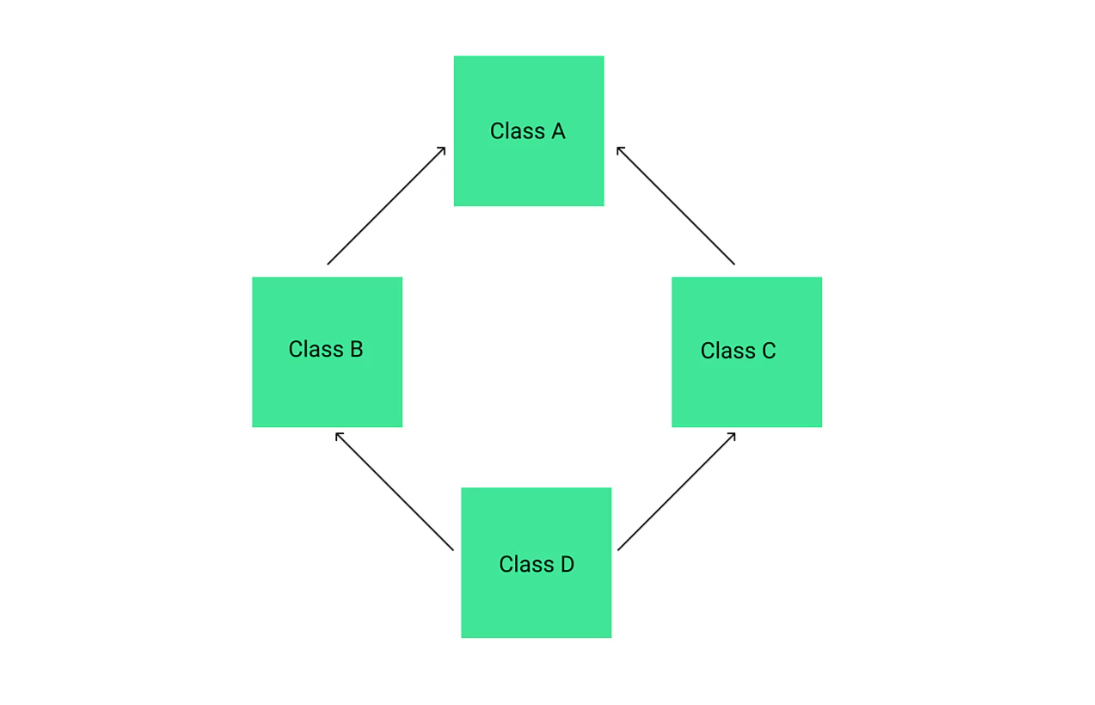

In [39]:
class BaseClass:
    num_base_cell = 0
    
    def call_me(self):
        print("call on base class")
        # چطور این متغییر کلاس به متغییر آبجکت تبدیل میشود
        self.num_base_cell += 1
        
object1 = BaseClass()
object1.call_me()

object2 = BaseClass()
object2.call_me()

print(BaseClass.num_base_cell)
print(object1.num_base_cell)
print(object2.num_base_cell)

# ابتدا وقتی به این عبارت میرسد
# self.num_base_cell += 1
# تبدیل به این میکند
# self.num_base_cell = self.num_base_cell + 1
# self.num_base_cell = 0 + 1
# و با توجه به این یک متغییر نمونه جدید میسازد و به متغییر کلاس توجهی ندارد
# self.num_base_cell = 1

# متغییر نمونه را نوشتیم زیرا دفعه اول از آن متغییر استفاده بکند

call on base class
call on base class
0
1
1


In [45]:

class BaseClass:
    num_base_cell = 0
    
    def call_me(self):
        print("call on base class")
        self.num_base_cell += 1

        
class LeftSubClass(BaseClass):
    num_left_cell = 0
    
    def call_me(self):
        BaseClass.call_me(self)
        print("call on left class")
        self.num_left_cell += 1

class RightSubClass(BaseClass):
    num_right_cell = 0
    
    def call_me(self):
        BaseClass.call_me(self)
        print("call on right class")
        self.num_right_cell += 1

        
class SubClass(LeftSubClass, RightSubClass):
    num_sub_cell = 0
    
    def call_me(self):
        LeftSubClass.call_me(self)
        RightSubClass.call_me(self)
        print("call on sub class")
        self.num_sub_cell += 1

s = SubClass()
s.call_me()
print(s.num_sub_cell, s.num_left_cell, s.num_right_cell ,s.num_base_cell)

# همانطور که میبینید بیس کلاس دو مرتبه اجرا شده است زیرا با توجه به ترتیبی که خودممون ایجاد کردیم دومرتبه فراخوانده میشود

# راه حل
# mro

call on base class
call on left class
call on base class
call on right class
call on sub class
1 1 1 2


In [51]:
import pprint

class BaseClass:
    num_base_cell = 0
    
    def call_me(self):
        print("call on base class")
        self.num_base_cell += 1

        
class LeftSubClass(BaseClass):
    num_left_cell = 0
    
    def call_me(self):
        super().call_me()
        print("call on left class")
        self.num_left_cell += 1

class RightSubClass(BaseClass):
    num_right_cell = 0
    
    def call_me(self):
        super().call_me()
        print("call on right class")
        self.num_right_cell += 1

        
class SubClass(LeftSubClass, RightSubClass):
    num_sub_cell = 0
    
    def call_me(self):
        super().call_me()
        print("call on sub class")
        self.num_sub_cell += 1

s = SubClass()
s.call_me()
print(s.num_sub_cell, s.num_left_cell, s.num_right_cell ,s.num_base_cell)

# اما در اینجا ترتیب مهم نیست راست یا چپ

# برای دیدن ام ار او
print()
pprint.pprint(SubClass.__mro__)

call on base class
call on right class
call on left class
call on sub class
1 1 1 1

(<class '__main__.SubClass'>,
 <class '__main__.LeftSubClass'>,
 <class '__main__.RightSubClass'>,
 <class '__main__.BaseClass'>,
 <class 'object'>)


# initializeation in multiple inheritance

In [59]:
# در این راه حل روش و ترتیب فرستان آرگومان ها مهم است

class BaseClass:
    num_base_cell = 0
    
    def __init__(self, a, b, *args):
        self.a = a
        self.b = b
    
    def call_me(self):
        print("call on base class")
        self.num_base_cell += 1

        
class LeftSubClass(BaseClass):
    num_left_cell = 0
    
    def __init__(self, c, *args):
        super().__init__(*args)
        self.c = c
        
    def call_me(self):
        super().call_me()
        print("call on left class")
        self.num_left_cell += 1

class RightSubClass(BaseClass):
    num_right_cell = 0
    
    def __init__(self, d, e, f, *args):
        super().__init__(*args)
        self.d = d
        self.e = e
        self.f = f
        
    def call_me(self):
        super().call_me()
        print("call on right class")
        self.num_right_cell += 1

        
class SubClass(LeftSubClass, RightSubClass):
    num_sub_cell = 0
    
    def __init__(self, g, *args):
        super().__init__(*args)
        self.g = g
        
    def call_me(self):
        super().call_me()
        print("call on sub class")
        self.num_sub_cell += 1

s = SubClass(1, 2, 3, 4, 5, 6, 7)
print(s.a, s.b,s.c ,s.d ,s.e ,s.f ,s.g )
# در اینجا ترتیب خیلی مهم است و باید ترتیب ام آر او را دانست

        

6 7 2 3 4 5 1


In [60]:
# براینکه اهمیت ترتیب را کمتر بکنیم بجای آرگز از کیورد آرگز استفده بکنیم

class BaseClass:
    num_base_cell = 0
    
    def __init__(self, a, b ,**kwargs):
        self.a = a
        self.b = b
    
    def call_me(self):
        print("call on base class")
        self.num_base_cell += 1

        
class LeftSubClass(BaseClass):
    num_left_cell = 0
    
    def __init__(self, c, **kwargs):
        super().__init__(**kwargs)
        self.c = c
        
    def call_me(self):
        super().call_me()
        print("call on left class")
        self.num_left_cell += 1

class RightSubClass(BaseClass):
    num_right_cell = 0
    
    def __init__(self, d, e, f, **kwargs):
        super().__init__(**kwargs)
        self.d = d
        self.e = e
        self.f = f
        
    def call_me(self):
        super().call_me()
        print("call on right class")
        self.num_right_cell += 1

        
class SubClass(LeftSubClass, RightSubClass):
    num_sub_cell = 0
    
    def __init__(self, g, **kwargs):
        super().__init__(**kwargs)
        self.g = g
        
    def call_me(self):
        super().call_me()
        print("call on sub class")
        self.num_sub_cell += 1

s = SubClass(a=1, b=2, c=3, d=4, e=5, f=6, g=7)
print(s.a, s.b,s.c ,s.d ,s.e ,s.f ,s.g )



1 2 3 4 5 6 7


# polymorphism

In [1]:
print(len([1,2,3,4]))
print(len("reza dolati"))
print(len({"a":2 ,"b":3}))

4
11
2


In [10]:

class Cat:
    def __init__(self, name="", color=""):
        self.name = name
        self.color = color
        
    def info(self):
        print(f"hi , i am a cat , my name is {self.name}")
        
    def make_sound(self):
        print("meow...")
        
        
class Cow:
    def __init__(self, name="", color=""):
        self.name = name
        self.color = color
        
    def info(self):
        print(f"hi , i am a cow , my name is {self.name}")
        
    def make_sound(self):
        print("maa...")
        
cat = Cat("jack", "black")
cow = Cow("jan", "brown")

for animal in [cat , cow]:
    animal.make_sound()
    animal.info()
# همانطور که در حلقه میبینید ما نگران نبودیم آیا متدها در حلقه هر دوتا نام یکسان در دوتا آبجکت وجود دارد و با رفتار مخصوصو خودشان
print()

def func(obj):
    obj.info()
    obj.make_sound()
func(cat)
func(cow)    

# در انجا از یک تابع یکسان استفاده میکنیم اما رفتار متفاوت را ملاحظه میکنیم

meow...
hi , i am a cat , my name is jack
maa...
hi , i am a cow , my name is jan

hi , i am a cat , my name is jack
meow...
hi , i am a cow , my name is jan
maa...


In [13]:
# شایع ترین حالت پلی مورفیسم در ارثبری است

class Animal:
    def __init__(self, name="", color=""):
        self.name = name
        self.color = color
        
    def info(self):
        print(f"hi , i am a animal , my name is {self.name}")
        
    def make_sound(self):
        print("i cant...")
        
        
    
class Cat(Animal):
    def __init__(self, name="", color=""):
        super().__init__(name, color)
        
    def info(self):
        print(f"hi , i am a cat , my name is {self.name}")
        
    def make_sound(self):
        print("meow...")
        
        
class Cow(Animal):
    def __init__(self, name="", color=""):
        super().__init__(name, color)
        
    def info(self):
        print(f"hi , i am a cow , my name is {self.name}")
        
    def make_sound(self):
        print("maa...")
        
animal = Animal()        
cat = Cat("jack", "black")
cow = Cow("jan", "brown")

# همانطور که میبینید متد یکسان است اما رفتار متفاوت دارند
animal.make_sound()        
cat.make_sound()
cow.make_sound()


i cant...
meow...
maa...
